In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
datas = pd.read_csv("musteriler.csv")
datas.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [30]:
'''Veri seti içerisinde boş veri olup olmadığını, satır ve sütun sayılarıyla ilgili bilgileri veya ilgili sütunların veri tipini öğrenmek için 
pandas kütüphanesinde mevcut olan info() özelliği kullanıldı.'''
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        200 non-null    int64 
 1   Cinsiyet  200 non-null    object
 2   Yas       200 non-null    int64 
 3   Hacim     200 non-null    int64 
 4   Maas      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
x = datas.iloc[:,3:].values

In [22]:
import os 
os.environ["OMP_NUM_THREADS"] = "1" 
# K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3, init='k-means++')
kmeans.fit(x)
centers = kmeans.cluster_centers_
column_names = datas.columns[3:]
cluster_df = pd.DataFrame(
    centers,
    columns = [f'{column} Average' for column in column_names],
    index = [f'Küme {i}' for i in range(len(centers))]
)
print(cluster_df)

        Hacim Average  Maas Average
Küme 0   22069.411765   5320.882353
Küme 1   58643.478261   5844.927536
Küme 2  104386.956522   7289.130435


[242389902746.875, 69083288306.74911, 37427316783.60773, 19714454147.64823, 12888299823.99516, 8631933632.939518, 6875375159.030952, 5252793067.744504, 4364061882.760295, 3423515070.245521]


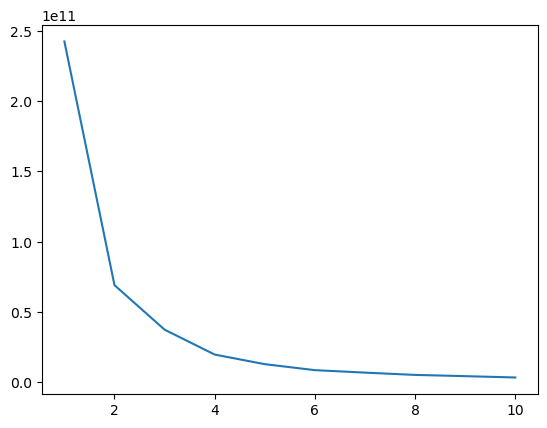

In [23]:
results = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=123)
    kmeans.fit(x)
    results.append(kmeans.inertia_)

print(results)
plt.plot(range(1,11),results)

[3 3 3 2 2 2 2 3 2 0 0 3 0 2 3 1 3 2 3 3 2 2 3 0 1 0 2 3 2 0 2 0 0 3 0 0 0
 2 0 1 3 2 3 2 2 0 0 0 0 1 2 3 1 1 3 3 2 3 0 3 1 3 0 2 0 2 0 3 0 2 3 3 3 3
 2 2 1 3 0 2 2 2 0 0 1 3 3 0 2 2 3 2 1 0 2 0 2 3 2 2 0 1 3 2 2 3 3 0 0 1 1
 3 3 3 3 0 2 3 0 0 2 0 3 3 3 0 2 2 1 2 2 0 0 0 0 2 0 0 3 0 3 2 0 0 3 0 2 0
 0 2 0 0 3 2 0 1 2 0 1 2 0 2 2 0 2 0 0 3 2 2 3 2 2 0 0 2 2 0 1 0 0 3 0 1 3
 1 2 2 0 2 0 2 0 3 2 3 3 0 0 0]


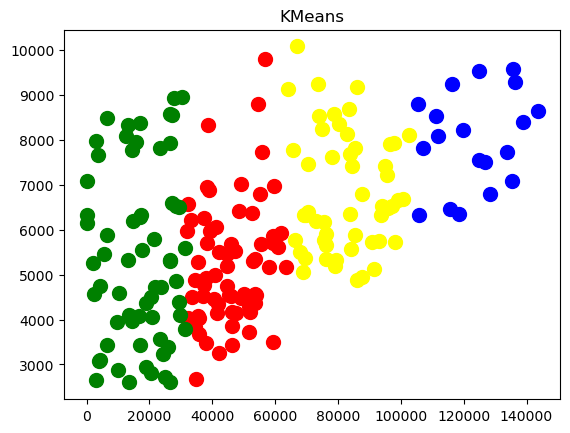

In [24]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=123)
y_prediction = kmeans.fit_predict(x)
print(y_prediction)
plt.scatter(x[y_prediction==0,0],x[y_prediction==0,1],s=100, c='red')
plt.scatter(x[y_prediction==1,0],x[y_prediction==1,1],s=100, c='blue')
plt.scatter(x[y_prediction==2,0],x[y_prediction==2,1],s=100, c='green')
plt.scatter(x[y_prediction==3,0],x[y_prediction==3,1],s=100, c='yellow')
plt.title('KMeans')
plt.show()

In [25]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_predict = ac.fit_predict(x)
print(y_predict)

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 3 0 2 0 0 2 2 0 1 3 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 3 0 2 0 2 2 1 1 1 1 3 2 0 3 3 0 0 2 0 1 0 3 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 3 0 1 2 2 2 1 1 3 0 0 1 2 2 0 2 3 1 2 1 2 0 2 2 1 3 0 2 2 0 0 1 1 3 3
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 3 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 3 2 1 3 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 3 1 1 0 1 3 0
 3 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


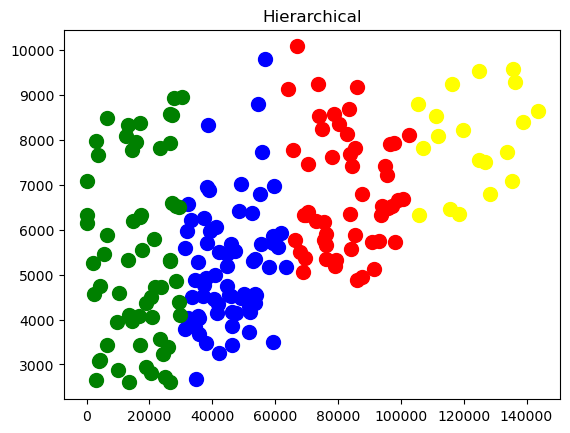

In [26]:
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100, c='red')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100, c='blue')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100, c='green')
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=100, c='yellow')
plt.title('Hierarchical')
plt.show()

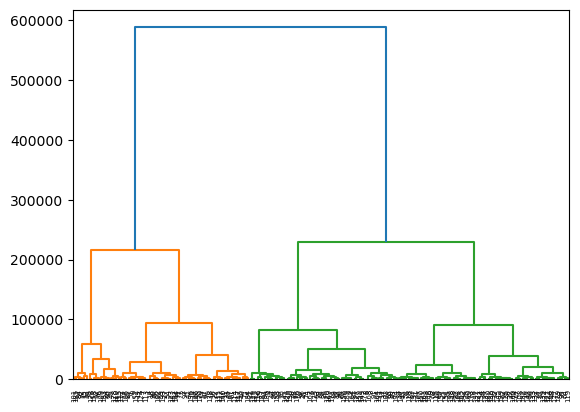

In [28]:
# Scipy
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.show()